# Notebook to get brain masks of T1 images for kwyk

## *NOTE this is actually not necessary, it increases uncertainty as kwyk only calculates uncertainty for the labelled regions anyway

In [1]:
import nilearn as nl
from nilearn import plotting, image, masking
import json
import numpy as np
import nibabel as nb
import pandas as pd
import glob
import os
import json

### which subjects have a t1

In [2]:
merged_qc = pd.read_csv('../data/merged_qc.csv', index_col=False)

In [11]:
t1_subjects=[]
for index, row in merged_qc.iterrows():
    t1_file=f'/nese/mit/group/sig/projects/hbn/hbn_bids/sub-{row["sub"]}/ses-{row["ses"]}/anat/sub-{row["sub"]}_ses-{row["ses"]}_*T1w.nii.gz'
    #t1_file=f'/nese/mit/group/sig/projects/hbn/hbn_bids/derivatives/fmriprep_23.2.0/sub-{row["sub"]}/ses-{row["ses"]}/anat/sub-{row["sub"]}_ses-{row["ses"]}_*_T1w.nii.gz'
    matching_files = glob.glob(t1_file)
    if matching_files:
        #print(f"{t1_file} exists")
        #print(matching_files[0])
        t1_subjects.append(row["sub"])
        #print(row["sub"])
    else:
        # print(f"!does not exist!")
        continue

In [21]:
len(list(set(t1_subjects)))

2231

### which subjects have (ANY) raw fmri data

In [13]:
fmri_subjects=[]
for index, row in merged_qc.iterrows():
    fmri_file=f'/nese/mit/group/sig/projects/hbn/hbn_bids/sub-{row["sub"]}/ses-{row["ses"]}/func/sub-{row["sub"]}_ses-{row["ses"]}_*_bold.nii.gz'
    #t1_file=f'/nese/mit/group/sig/projects/hbn/hbn_bids/derivatives/fmriprep_23.2.0/sub-{row["sub"]}/ses-{row["ses"]}/anat/sub-{row["sub"]}_ses-{row["ses"]}_*_T1w.nii.gz'
    matching_files = glob.glob(fmri_file)
    if matching_files:
        #print(f"{t1_file} exists")
        #print(matching_files[0])
        fmri_subjects.append(row["sub"])
        #print(row["sub"])
    else:
        # print(f"!does not exist!")
        continue

In [22]:
len(list(set(fmri_subjects)))

2263

### which subjects have (ANY) fmriprepped data

In [23]:
fmriprep_subjects=[]
for index, row in merged_qc.iterrows():
    #fmri_file=f'/nese/mit/group/sig/projects/hbn/hbn_bids/sub-{row["sub"]}/ses-{row["ses"]}/func/sub-{row["sub"]}_ses-{row["ses"]}_*_bold.nii.gz'
    fmri_file=f'/nese/mit/group/sig/projects/hbn/hbn_bids/derivatives/fmriprep_23.2.0/sub-{row["sub"]}/ses-{row["ses"]}/func/sub-{row["sub"]}_ses-{row["ses"]}_*fsLR_den-91k_bold.dtseries.nii'
    matching_files = glob.glob(fmri_file)
    if matching_files:
        #print(f"{t1_file} exists")
        #print(matching_files[0])
        fmriprep_subjects.append(row["sub"])
        #print(row["sub"])
    else:
        # print(f"!does not exist!")
        continue

In [24]:
len(list(set(fmriprep_subjects)))

1998

In [27]:
union_subjects = list(set(fmriprep_subjects) & set(t1_subjects))
len(union_subjects)

1998

In [28]:
output_file = os.path.join("t1_fmriprep_subjects.txt")
with open(output_file, "w") as f:
    for idd in union_subjects:
        f.write(f"{idd}\n")

### did all of these subjects make it through kwyk?

In [6]:
import os


folder_path = '/om2/scratch/tmp/jsmentch/kwyk'
subject_ids = []

# Loop through all files in the folder
for filename in os.listdir(folder_path):
    # Check if the file has the expected format
    if filename.endswith('.nii.gz'):
        # Extract the subject ID by splitting the filename
        subject_id = filename.split('_')[0]
        subject_ids.append(subject_id)

subject_ids=list(set(subject_ids))

In [12]:
with open('t1_fmriprep_subjects.txt', 'r') as file:
    lines = file.readlines()
    lines = [line.strip() for line in lines]  # To remove any leading/trailing whitespace
difference = list(set(lines) - set(subject_ids))
difference

output_file = os.path.join("kwyk_stragglers.txt")
with open(output_file, "w") as f:
    for idd in difference:
        f.write(f"{idd}\n")

len(difference)

44

# notebook to look at the kwyk resulrs

## first apply the brain masks

In [ ]:
merged_qc = pd.read_csv('../data/merged_qc.csv', index_col=False)

In [ ]:
first_three_rows = merged_qc.head(10)
first_three_rows

In [5]:
for index, row in merged_qc.iterrows():
    file_path = f'../../kwyk/brain_masked_t1s/sub-{row["sub"]}_masked-t1.nii.gz'
    if not os.path.exists(file_path):
        #t1_file=f'/nese/mit/group/sig/projects/hbn/hbn_bids/sub-{row["sub"]}/ses-{row["ses"]}/anat/sub-{row["sub"]}_ses-{row["ses"]}_*T1w.nii.gz'
        t1_file=f'/nese/mit/group/sig/projects/hbn/hbn_bids/derivatives/fmriprep_23.2.0/sub-{row["sub"]}/ses-{row["ses"]}/anat/sub-{row["sub"]}_ses-{row["ses"]}_*_T1w.nii.gz'
        matching_files = glob.glob(t1_file)
        if matching_files:
            #print(f"{t1_file} exists")
            matching_files = [file for file in matching_files if 'space-MNI152NLin2009cAsym' not in file]
    
            img_t1=matching_files[0]
            t1_img = nb.load(img_t1)
    
            #print(img_t1)
            mask_file=f'/nese/mit/group/sig/projects/hbn/hbn_bids/derivatives/fmriprep_23.2.0/sub-{row["sub"]}/ses-{row["ses"]}/anat/sub-{row["sub"]}_ses-{row["ses"]}*brain_mask.nii.gz'
            matching_mask_files=glob.glob(mask_file)
            #print(matching_mask_files)
    
            matching_mask_files = [file for file in matching_mask_files if 'space-MNI152NLin2009cAsym' not in file]
    
            img_mask=matching_mask_files[0]
            #print(img_mask)
    
            mask_img = nb.load(img_mask)
    
            masked_data=masking.apply_mask(img_t1, img_mask)
            t1_data = t1_img.get_fdata()
            mask_data = mask_img.get_fdata()
    
            masked_t1_data = np.zeros(t1_data.shape)
            
            # Fill the 3D array with the masked data
            masked_t1_data[mask_data > 0] = masked_data
            
            # Create a new Nifti image
            masked_t1_img = nib.Nifti1Image(masked_t1_data, affine=t1_img.affine)
    
            # plotting.plot_anat(masked_t1_img, title='Masked T1 Image')
            # plotting.show()
        else:
            print(f"{t1_file} does not exist")
        nb.save(masked_t1_img, f'../../kwyk/brain_masked_t1s/sub-{row["sub"]}_masked-t1.nii.gz')


NameError: name 'nib' is not defined

In [5]:
img_t1='/nese/mit/group/sig/projects/hbn/hbn_bids/derivatives/fmriprep_23.2.0/sub-NDARWW005GCU/ses-HBNsiteRU/anat/sub-NDARWW005GCU_ses-HBNsiteRU_acq-HCP_desc-preproc_T1w.nii.gz'
# plotting.plot_img(img)
img_mask='/nese/mit/group/sig/projects/hbn/hbn_bids/derivatives/fmriprep_23.2.0/sub-NDARWW005GCU/ses-HBNsiteRU/anat/sub-NDARWW005GCU_ses-HBNsiteRU_acq-HCP_desc-brain_mask.nii.gz'
#plotting.plot_img(img)


In [9]:
img_masked=masking.apply_mask(img_t1, img_mask)
#plotting.plot_img(img_masked)


In [17]:
t1_img = nib.load(img_t1)

# Load the mask that was used to create the 2D numpy array
mask_img = nib.load(img_mask)


masked_data = img_masked  # Replace with your actual data

# Get the data from the T1 and mask images
t1_data = t1_img.get_fdata()
mask_data = mask_img.get_fdata()

In [19]:
# Create an empty 3D array with the same shape as the T1 image
masked_t1_data = np.zeros(t1_data.shape)

# Fill the 3D array with the masked data
masked_t1_data[mask_data > 0] = masked_data

# Create a new Nifti image
masked_t1_img = nib.Nifti1Image(masked_t1_data, affine=t1_img.affine)


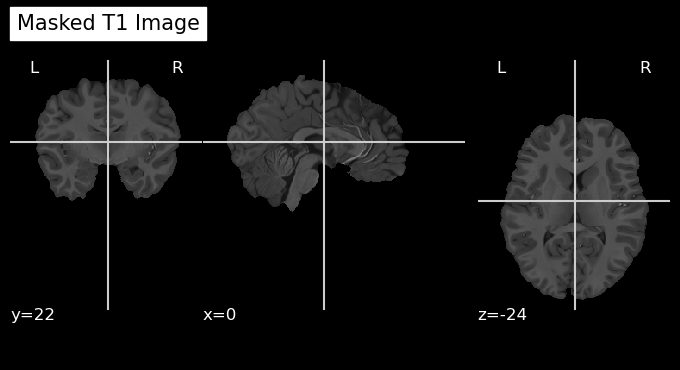

In [20]:
plotting.plot_anat(masked_t1_img, title='Masked T1 Image')
plotting.show()

In [ ]:
nb.save(masked_t1_img, 'masked_t1_img.nii.gz')

## get the straggler files that did not run kwyk

In [ ]:
import os
import glob

# Directory containing your files
directory = "/om2/scratch/tmp/jsmentch/kwyk/brain_masked_t1s/"
directory2= "/om2/scratch/tmp/jsmentch/kwyk/output/"
# Get all .nii.gz files matching the pattern
nii_files = glob.glob(os.path.join(directory, "sub-*_masked-t1.nii.gz"))

# List to store IDs where corresponding .json file is missing
missing_json_ids = []

# Iterate over the .nii.gz files
for nii_file in nii_files:
    # Extract the ID from the filename
    basename = os.path.basename(nii_file)
    id_part = basename.replace("sub-", "").replace("_masked-t1.nii.gz", "")
    
    # Construct the corresponding .json filename
    json_file = os.path.join(directory2, f"{id_part}_uncertainty.json")
    
    # Check if the .json file does not exist
    if not os.path.exists(json_file):
        missing_json_ids.append(id_part)

# Print the list of IDs where the .json file is missing
#print("IDs with missing .json files:")
for missing_id in missing_json_ids:
    print(missing_id)


In [4]:
output_file = os.path.join("kwyk_stragglers.txt")

# Save the list of missing IDs to a text file
with open(output_file, "w") as f:
    for missing_id in missing_json_ids:
        f.write(f"{missing_id}\n")

In [5]:
len(missing_json_ids)

100

## look at all kwyk results

### does brain masking lower uncertainty?

In [9]:
#with open('pilots_ru_dm_list.txt', 'r') as file:
with open('pilots_ru_dm_list.txt', 'r') as file:
    sub_list = file.readlines()
good_subjects_list = [line.strip() for line in sub_list]
#good_subjects_list.remove('NDARUT018UYN') #no freesurfer sub
# good_subjects_list.remove('NDARRM073JKA')#xcp straggler


# with open('good_pilots_ru_dm_list.txt', 'r') as file:
#     sub_list = file.readlines()
# good_subjects_list = [line.strip() for line in sub_list]

# good_subjects_list


In [18]:
uncertainty_list=[]
uncertainty_list2=[]

 # # # # kwyk uncertainty
for sub in good_subjects_list:
    try:
        with open(f'/om2/scratch/tmp/jsmentch/kwyk/output/{sub}_uncertainty.json', 'r') as file:
            data = json.load(file)    
        uncertainty_list2.append(data['uncertainty'])
        with open(f'/om2/user/jsmentch/kwyk/{sub}_uncertainty.json', 'r') as file:
            data = json.load(file)    
        uncertainty_list.append(data['uncertainty'])
    except:
        print('oops')
        
 # # # # kwyk uncertainty


oops
oops


In [19]:
uncertainty_list

[0.30114851592082753,
 0.38846302411653666,
 0.3442686029046487,
 0.3310757183574656,
 0.3599326493265152,
 0.34011648991826915,
 0.3542825754091647,
 0.3667332405505829,
 0.35450136198406035,
 0.37990643817765496,
 0.36695809532013723,
 0.3801996134947518,
 0.3337692839219906,
 0.4528292088769268,
 0.36541305142474517,
 0.40582511036650853,
 0.30042720941014567,
 0.3767570921794444,
 0.37565557348795653,
 0.39930204219637466,
 0.34367377903355906,
 0.3954519657978831,
 0.359614493508545,
 0.38782091048174616]

/tmp/ipykernel_508029/1910785775.py:24: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  ax.plot(positions, [list1[i], list2[i]], 'k-', marker='o', color='gray',linewidth=1)


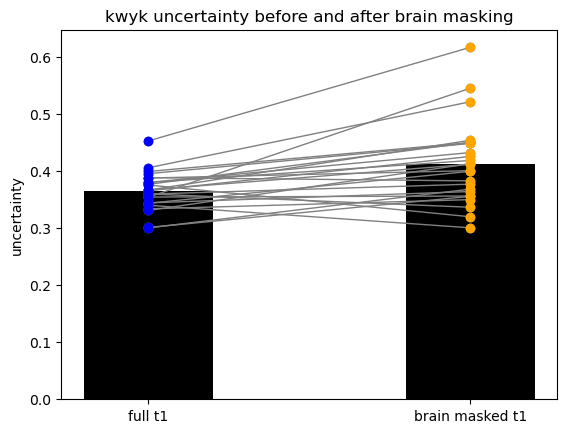

In [30]:
import matplotlib.pyplot as plt
import numpy as np

# Example data
list1 = uncertainty_list
list2 = uncertainty_list2


# Calculate the means
mean1 = np.mean(list1)
mean2 = np.mean(list2)

# Positions of the bars on the x-axis
positions = [0, 1]

# Create the bar plot
fig, ax = plt.subplots()

# Plot bars for the means
bars = ax.bar(positions, [mean1, mean2], color=['k', 'k'], width=0.4)

# Overlay individual data points and connect them with lines
for i in range(len(list1)):
    ax.plot(positions, [list1[i], list2[i]], 'k-', marker='o', color='gray',linewidth=1)

# Add the individual points on top of the bars
ax.scatter([0] * len(list1), list1, color='blue', zorder=5)
ax.scatter([1] * len(list2), list2, color='orange', zorder=5)

# Adding labels and title
ax.set_xticks(positions)
ax.set_xticklabels(['full t1', 'brain masked t1'])
ax.set_ylabel('uncertainty')
ax.set_title('kwyk uncertainty before and after brain masking')

# Display the plot
plt.show()

